# Ficha 10
# Ensemble Learning

Ensemble Learning é uma técnica de Machine Learning que combina vários modelos com o objetivo de obter um modelo preditivo ótimo
Existem várias classes de Ensemble Learning, sendo as mais usuais e abordadas neste enunciado o BAGGing (Boostrap AGGregation), o Boosting, o Stacking e o Max Voting (Majority Voting).

• Bagging envolve o ajuste de árvores de decisão em diferentes amostras do mesmo conjunto de dados, avaliando pelo cálculo da média dessas previsões.

• Boosting envolve a adição sequencial de membros ensemble que corrigem as previsões feitas por modelos anteriores e produz uma média ponderada das previsões.

• Stacking envolve o ajuste de diferentes tipos de modelos no mesmo conjunto de dados, usando outro modelo para aprender a melhor forma de combinar as previsões.

• Max voting envolve o ajuste de vários modelos, em que cada um produz uma previsão e vota em cada amostra. Apenas a classe com os votos mais elevados é incluída na classe de previsão final.
Pretende-se, com este enunciado prático, que seja realizado um conjunto de tarefas que permitam uma maior compreensão da estrutura e do funcionamento de modelos Ensemble Learning.

# Ensemble Learning: Bagging, Boosting, Stacking and Max Voting Examples

For this example, we will use the already known dataset <em>titanic.csv</em>. Our goal is to predict which passengers survived the Titanic shipwreck.

We have used Logistic Regression in this context; now, we are going to try a few ensemble learning models.

## The Data

It will be used data frame with 891 observations on the following 12 variables:

* **PassengerId**
* **Survival** - 0 = No, 1 = Yes
* **Pclass** - Ticket class; 1 = 1st class, 2 = 2nd class, 3 = 3rd class
* **Sex**
* **Age**
* **SibSp** - Number of siblings/spouses aboard the ship
* **Parch** - Number of parents/children aboard the ship
* **Ticket**
* **Fare**
* **Cabin**
* **Embarked** - Port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

You may need to install <em>**xgboost**</em>. Use one of the following commands:

<code>conda install -c conda-forge xgboost</code>

<code>pip install xgboost</code>

In [1]:
%pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 262.6 kB/s eta 0:06:20
   ---------------------------------------- 0.0/99.8 MB 262.6 kB/s eta 0:06:20
   ---------------------------------------- 0.0/99.8 MB 262.6 kB/s eta 0:06:20
   ---------------------------------------- 0.0/99.8 MB 262.6 kB/s eta 0:06:20
   ---------------------------------------- 0.0/99.8 MB 122.9 kB/s eta 0:13:32
   ---------------------------------------- 0.1/99.8 MB 172.4 kB/s eta 0:09:39
   -------------------------------------

## Import libraries

In [2]:
import sklearn as skl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn import tree

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.metrics import classification_report

## Get the data and inspect it

In [6]:
df = pd.read_csv("titanic.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's check the missing values:

<Axes: >

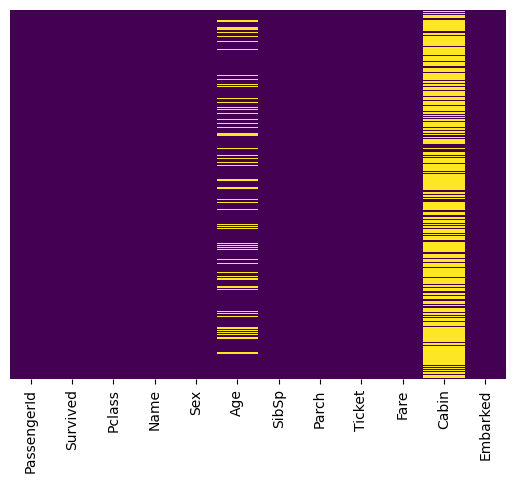

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Let's analyse the <em>Age</em> distribution with the ticket class, <em>Pclass</em>:

<Axes: xlabel='Pclass', ylabel='Age'>

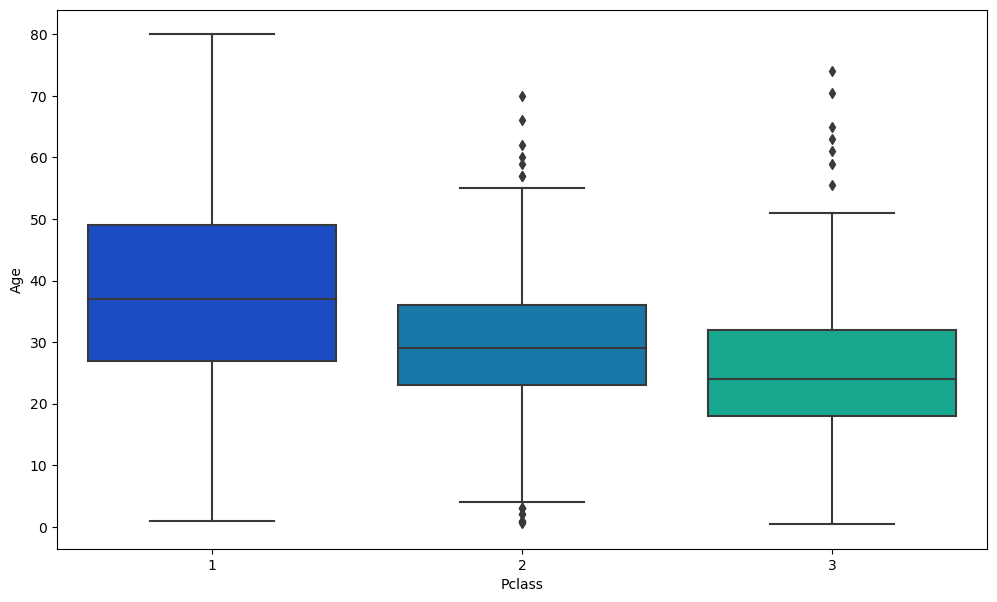

In [11]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')

Let's impute the missing values in <em>Age</em> with the ticket class, <em>Pclass</em>:

In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37        

        elif Pclass == 2:
           return 29

        else:
            return 24

    else:
        return Age

In [13]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

We will drop features: <em>Cabin</em>, <em>Sex</em>, <em>Embarked</em>, <em>Name</em> and <em>Ticket</em>

In [14]:
df.drop('Cabin', axis=1, inplace=True)
df.dropna(inplace=True)

In [15]:
df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


## Prepare the data frames

In [17]:
x = df.drop('Survived', axis=1)
y = df['Survived']

## Train Test Split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((622, 6), (622,), (267, 6), (267,))

## Models

Let's try different models. We will implement a Decision Tree and a Support Vector Machine for comparison with the Ensemble Learning Models.

### Decision Tree

Implement a <em>DT Classifier</em> with <em>max_depth</em> of 2 and a <em>random_state</em> of 2022. Then fit the created model:

In [20]:
dt_model = DecisionTreeClassifier(max_depth=2, random_state=2022)

In [21]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=2022)

Obtain the accuracy of the model:

In [22]:
dt_score = dt_model.score(X_test, y_test)

In [24]:
print("Accuracy: %.2f%%" % (dt_score * 100))

Accuracy: 69.29%


Obtain the predictions and print the <em>classification_report</em>:

In [26]:
dt_predictions = dt_model.predict(X_test)

In [27]:
print(classification_report(y_test, dt_predictions))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       173
           1       0.56      0.56      0.56        94

    accuracy                           0.69       267
   macro avg       0.66      0.66      0.66       267
weighted avg       0.69      0.69      0.69       267



Save the model's accuracy in a dictionary:

In [38]:
results = {'DT': dt_score}

In [39]:
print(results)

{'DT': 0.6928838951310862}


### Support Vector Machine



Implement a <em>SVM</em> with a <em>random_state</em> of 2022. Then fit the created model:

In [40]:
svm_model = SVC(random_state=2022)

In [41]:
svm_model.fit(X_train, y_train)

SVC(random_state=2022)

Obtain the accuracy of the model:

In [42]:
svm_score = svm_model.score(X_test, y_test)

In [43]:
print("Accuracy: %.2f%%" % (svm_score * 100))

Accuracy: 68.16%


Obtain the predictions and print the <em>classification_report</em>:

In [33]:
svm_predictions = svm_model.predict(X_test)

In [34]:
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.68      0.97      0.80       173
           1       0.71      0.16      0.26        94

    accuracy                           0.68       267
   macro avg       0.70      0.56      0.53       267
weighted avg       0.69      0.68      0.61       267



Save the model's accuracy in the dictionary:

In [44]:
results['SVM'] = svm_score

In [45]:
print(results['SVM'])

0.6816479400749064


Let's try some <em>Ensemble Learning</em> models.

### Bagging <em>(Bootstrap Aggregating)</em>

Implement a <em>StratifiedShuffleSplit</em> with <em>n_splits</em> of 10, <em>test_size</em> of 20 and a <em>random_state</em> of 2022:

In [46]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=20, random_state=2022)

Implement a <em>BaggingClassifier</em> with the previous <em>DT</em> model and <em>bootstrap</em> set <em>True</em>:

In [47]:
bg_model = BaggingClassifier(estimator=dt_model, bootstrap=True)

Implement a <em>GridSearchCV</em> with the <em>BaggingClassifier</em> model, <em>n_estimators</em> of [10, 40, 60, 80, 100, 160] as <em>parameters</em> and the <em>StratifiedShuffleSplit</em> as <em>cv</em>. Then fit the created model:

In [48]:
n_estimators = [10,40,60,80,100,160]

In [49]:
parameters = {'n_estimators': n_estimators}

In [50]:
grid_bg = GridSearchCV(estimator = bg_model, param_grid = parameters, cv = sss)

In [51]:
grid_bg.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=2022, test_size=20,
            train_size=None),
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=2022)),
             param_grid={'n_estimators': [10, 40, 60, 80, 100, 160]})

Obtain the <em>best_estimator</em>:

In [57]:
bst_bg_model = grid_bg.best_estimator_

In [58]:
print(bst_bg_model)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                   random_state=2022))


Fit the best model:

In [54]:
bst_bg_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                   random_state=2022))

Obtain the accuracy of the best model:

In [55]:
bst_bg_score = bst_bg_model.score(X_test, y_test)

In [56]:
print("Accuracy: %.2f%%" % (bst_bg_score *100))

Accuracy: 69.29%


Obtain the predictions and print the <em>classification_report</em>:

In [59]:
bg_predictions = bst_bg_model.predict(X_test)

In [61]:
print(classification_report(y_test, bg_predictions))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77       173
           1       0.57      0.53      0.55        94

    accuracy                           0.69       267
   macro avg       0.66      0.66      0.66       267
weighted avg       0.69      0.69      0.69       267



Save the model's accuracy in the dictionary:

In [62]:
results['Bagg']= bst_bg_score

In [64]:
print(results)

{'DT': 0.6928838951310862, 'SVM': 0.6816479400749064, 'Bagg': 0.6928838951310862}


#### Random Forest

Implement a <em>RandomForestClassifier</em> with <em>bootstrap</em> set <em>False</em>, <em>max_depth</em> of 2 and <em>verbose</em> of 1. Then fit the created model:

In [65]:
rf_model = RandomForestClassifier(bootstrap=False, max_depth=2, verbose=1)

In [66]:
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=False, max_depth=2, verbose=1)

Obtain the accuracy of the model:

In [67]:
rf_score = rf_model.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [68]:
print("Accuracy: %.2f%%" % (rf_score * 100))

Accuracy: 73.78%


Obtain the predictions and print the <em>classification_report</em>:

In [69]:
rf_predictions = rf_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [70]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       173
           1       0.64      0.57      0.61        94

    accuracy                           0.74       267
   macro avg       0.71      0.70      0.71       267
weighted avg       0.73      0.74      0.73       267



Save the model's accuracy in the dictionary:

In [71]:
results['RF'] = rf_score

In [72]:
print(results)

{'DT': 0.6928838951310862, 'SVM': 0.6816479400749064, 'Bagg': 0.6928838951310862, 'RF': 0.7378277153558053}


### Boosting

#### Gradient Boosting

Implement a <em>GradientBoostingClassifier</em> with <em>n_estimators</em> of 100, <em>learning_rate</em> of 1.0, <em>max_depth</em> of 1 and <em>random_state</em> of 2022. Then fit the created model:

In [73]:
gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=2022)

In [74]:
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=2022)

Obtain the accuracy of the model:

In [75]:
gbc_score = gbc_model.score(X_test, y_test)

In [76]:
print("Accuracy: %.2f%%" % (gbc_score * 100))

Accuracy: 71.16%


Obtain the predictions and print the <em>classification_report</em>:

In [78]:
gbc_predictions = gbc_model.predict(X_test)

In [79]:
print(classification_report(y_test, gbc_predictions))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       173
           1       0.60      0.53      0.56        94

    accuracy                           0.71       267
   macro avg       0.68      0.67      0.67       267
weighted avg       0.71      0.71      0.71       267



Save the model's accuracy in the dictionary:

In [80]:
results['GB'] = gbc_score

In [81]:
print(results)

{'DT': 0.6928838951310862, 'SVM': 0.6816479400749064, 'Bagg': 0.6928838951310862, 'RF': 0.7378277153558053, 'GB': 0.7116104868913857}


#### XGBoost

Implement a <em>XGBClassifier</em> with <em>max_depth</em> of 1 and <em>objective</em> of <em>reg:squarederror</em>. Then fit the created model:

In [82]:
xgb_model = XGBClassifier(max_depth=1, objective='reg:squarederror')

In [83]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='reg:squarederror', ...)

Obtain the accuracy of the model:

In [84]:
xgb_score = xgb_model.score(X_test, y_test)

In [85]:
print("Accuracy: %.2f%%" % (xgb_score * 100))

Accuracy: 73.03%


Obtain the predictions and print the <em>classification_report</em>:

In [86]:
xgb_predictions = xgb_model.predict(X_test)

In [87]:
print(classification_report(y_test, xgb_predictions))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       173
           1       0.65      0.51      0.57        94

    accuracy                           0.73       267
   macro avg       0.71      0.68      0.69       267
weighted avg       0.72      0.73      0.72       267



Save the model's accuracy in the dictionary:

In [88]:
results['XGB'] = xgb_score

In [89]:
print(results)

{'DT': 0.6928838951310862, 'SVM': 0.6816479400749064, 'Bagg': 0.6928838951310862, 'RF': 0.7378277153558053, 'GB': 0.7116104868913857, 'XGB': 0.7303370786516854}


### Stacking

#### StackingClassifier

Implement a <em>StackingClassifier</em> with 3 <em>estimators</em> (DT, SVM and RF models) and <em>LogisticRegression</em> as <em>final_estimator</em>. Then fit the created model:

In [90]:
estimators = [("dt", dt_model), ("svm", svm_model), ("rf", rf_model)]

In [91]:
st_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [92]:
st_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(max_depth=2,
                                                       random_state=2022)),
                               ('svm', SVC(random_state=2022)),
                               ('rf',
                                RandomForestClassifier(bootstrap=False,
                                                       max_depth=2,
                                                       verbose=1))],
                   final_estimator=LogisticRegression())

Obtain the accuracy of the model:

In [93]:
st_score = st_model.score(X_test, y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [94]:
print("Accuracy: %.2f%%" % (st_score * 100))

Accuracy: 71.54%


Obtain the predictions and print the <em>classification_report</em>:

In [95]:
st_predictions = st_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [96]:
print(classification_report(y_test, st_predictions))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79       173
           1       0.62      0.50      0.55        94

    accuracy                           0.72       267
   macro avg       0.69      0.67      0.67       267
weighted avg       0.71      0.72      0.71       267



Save the model's accuracy in the dictionary:

In [97]:
results['Stack']= st_score

In [98]:
print(results)

{'DT': 0.6928838951310862, 'SVM': 0.6816479400749064, 'Bagg': 0.6928838951310862, 'RF': 0.7378277153558053, 'GB': 0.7116104868913857, 'XGB': 0.7303370786516854, 'Stack': 0.7153558052434457}


### Max Voting

#### Majority Class Labels (Majority/Hard Voting)

Implement a <em>VotingClassifier</em> with 3 <em>estimators</em> (DT, SVM and RF models), <em>voting</em> of <em>hard</em> and <em>weights</em> of [2, 1, 2]. Then fit the created model:

In [99]:
hvt_model = VotingClassifier(estimators=[("dt", dt_model), ("svm", svm_model), ("rf", rf_model)], voting='hard', weights=[2,1,2])

In [100]:
hvt_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=2,
                                                     random_state=2022)),
                             ('svm', SVC(random_state=2022)),
                             ('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=2, verbose=1))],
                 weights=[2, 1, 2])

Obtain the accuracy for each model using <em>cross_val_score</em>:

In [101]:
for model, label in zip([dt_model, svm_model, rf_model, hvt_model], ['dt', 'svm', 'rf', 'Ensemble']):
    hvt_score = cross_val_score(model, X_test, y_test, scoring = 'accuracy', cv = 5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (hvt_score.mean(), hvt_score.std(), label))

Accuracy: 0.69 (+/- 0.05) [dt]
Accuracy: 0.66 (+/- 0.04) [svm]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Accuracy: 0.70 (+/- 0.06) [rf]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Us

Accuracy: 0.69 (+/- 0.07) [Ensemble]


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Obtain the accuracy of the max voted model:

In [102]:
hvt_score = hvt_model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (hvt_score * 100))

Accuracy: 73.03%


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Obtain the predictions and print the <em>classification_report</em>:

In [103]:
hvt_predictions = hvt_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [104]:
print(classification_report(y_test, hvt_predictions))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       173
           1       0.63      0.55      0.59        94

    accuracy                           0.73       267
   macro avg       0.70      0.69      0.69       267
weighted avg       0.72      0.73      0.73       267



Save the model's accuracy in the dictionary:

In [105]:
results['HVotW']= hvt_score

In [106]:
print(results)

{'DT': 0.6928838951310862, 'SVM': 0.6816479400749064, 'Bagg': 0.6928838951310862, 'RF': 0.7378277153558053, 'GB': 0.7116104868913857, 'XGB': 0.7303370786516854, 'Stack': 0.7153558052434457, 'HVotW': 0.7303370786516854}


## Models accuracy comparison

Let's plot a bar chart with the accuracy of each created model:

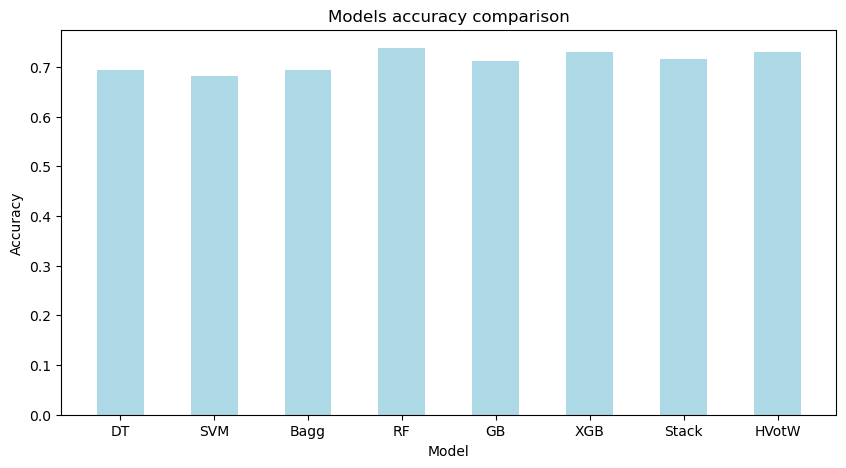

In [109]:
fig = plt.figure(figsize=(10,5))

mod = list(results.keys())
acc = list(results.values())

plt.bar(mod, acc, color='lightblue', width=0.5)

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Models accuracy comparison")
plt.show()

We can visualize the bars horizontally:

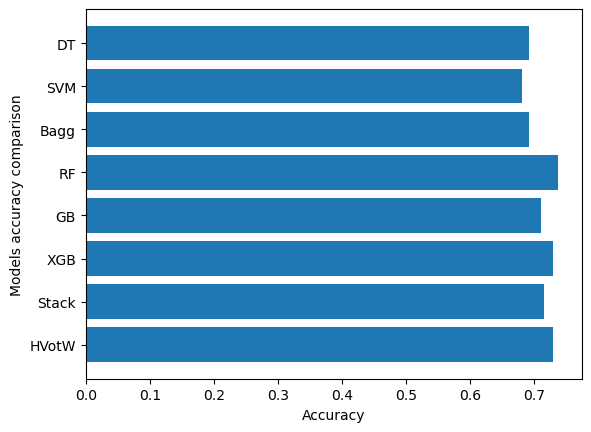

In [110]:
fig, ax = plt.subplots()

y_values = np.arange(len(mod))

ax.barh(y_values, acc, align='center')
ax.set_yticks(y_values, labels=mod)
ax.invert_yaxis()
ax.set_xlabel('Accuracy')
ax.set_ylabel('Models accuracy comparison')

plt.show()

Or simply print the dictionary created with the results:

In [112]:
print("Models accuracy comparison")

for key, value in results.items():
    print("%s \t % 2f" % (key, value))

Models accuracy comparison
DT 	  0.692884
SVM 	  0.681648
Bagg 	  0.692884
RF 	  0.737828
GB 	  0.711610
XGB 	  0.730337
Stack 	  0.715356
HVotW 	  0.730337


In [113]:
print("RF was the best model!")

RF was the best model!
